# 1. 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('data/train.csv')
print(np.shape(df))
df.tail()

(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [3]:
df.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A708667,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [4]:
len(df['Color'].unique())

366

### [데이터 탐색 결과]<br>
1) AnimalID : 동물의 일련번호로 primary key 역할을 한다 <font color="blue">(정수로 encoding 필요)</font><br><br>
2) Name : 동물의 이름. <font color="blue">(가장 많은 'Max'도 136마리에 불과하므로 binarize만 한다)</font><br><br>
3) DateTime : 결과가 행해진 시간. <font color="blue">(계절성을 띄는지 등의 변수 특성을 탐색할 필요가 있음)</font><br><br>
4) OutcomeType : 결과의 형태이자 <font color="red">Target</font>. 결과는 Adoption, Transfer, Return, Euthanasia(안락사), Died로 다섯 가지.<font color="blue">(One-Hot-Encoding필요)</font><br><br>
5) AnimalType : 동물의 종. dog와 cat 두가지로 나뉜다.<font color="blue">(dog면 1, cat이면 0으로 binarize필요)</font><br><br>
6) SexuponOutcome : 중성화 여부. 남성/여성/중성화남성/중성화여성/unknown으로 크게 다섯 가지로 나뉜다.<font color="blue">(성의 중요도도 클 것이라 예상)</font><br><br>
7) AgeuponOutcome : 결과가 행해질 당시의 동물의 나이.<font color="blue">(매우 중요할 것으로 예상, 단위 통일 필요)</font><br><br>
8) Breed : 동물의 종<font color="blue">(개/고양이의 세부 종, <font color="red">1380종</font>으로 매우 다양)</font><br><br>
9) Color : 동물의 색 <font color="blue">(<font color="red">366가지</font>로 매우다양)</font><br>

# 2. 데이터 전처리
- 전처리 된 독립변수를 df_pre에 새로 저장한다

## - 2.1 OutcomeType (One Hot Encoding)
- Label Binarizer를 통해 문자열을 OHE 처리

In [5]:
df["OutcomeType"].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelBinarizer

dfX = pd.DataFrame(LabelBinarizer().fit_transform(df["OutcomeType"]), 
                    columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'], index=df.index)
df_pre = pd.concat([df, dfX], axis=1)
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1


In [7]:
print(df['OutcomeType'].value_counts())

print(df_pre['Adoption'].value_counts())
print(df_pre['Transfer'].value_counts())
print(df_pre['Return_to_owner'].value_counts())
print(df_pre['Euthanasia'].value_counts())
print(df_pre['Died'].value_counts())

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64
0    15960
1    10769
Name: Adoption, dtype: int64
0    17307
1     9422
Name: Transfer, dtype: int64
0    21943
1     4786
Name: Return_to_owner, dtype: int64
0    25174
1     1555
Name: Euthanasia, dtype: int64
0    26532
1      197
Name: Died, dtype: int64


## - 2.2 Name (Binarize)

In [8]:
def Naming(x):
    if type(x) == float:
        return 0
    else:
        return 1

In [9]:
df_pre['Name'] = df['Name'].transform(Naming)

In [10]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1


In [11]:
print(df_pre['Name'].value_counts())


1    19038
0     7691
Name: Name, dtype: int64


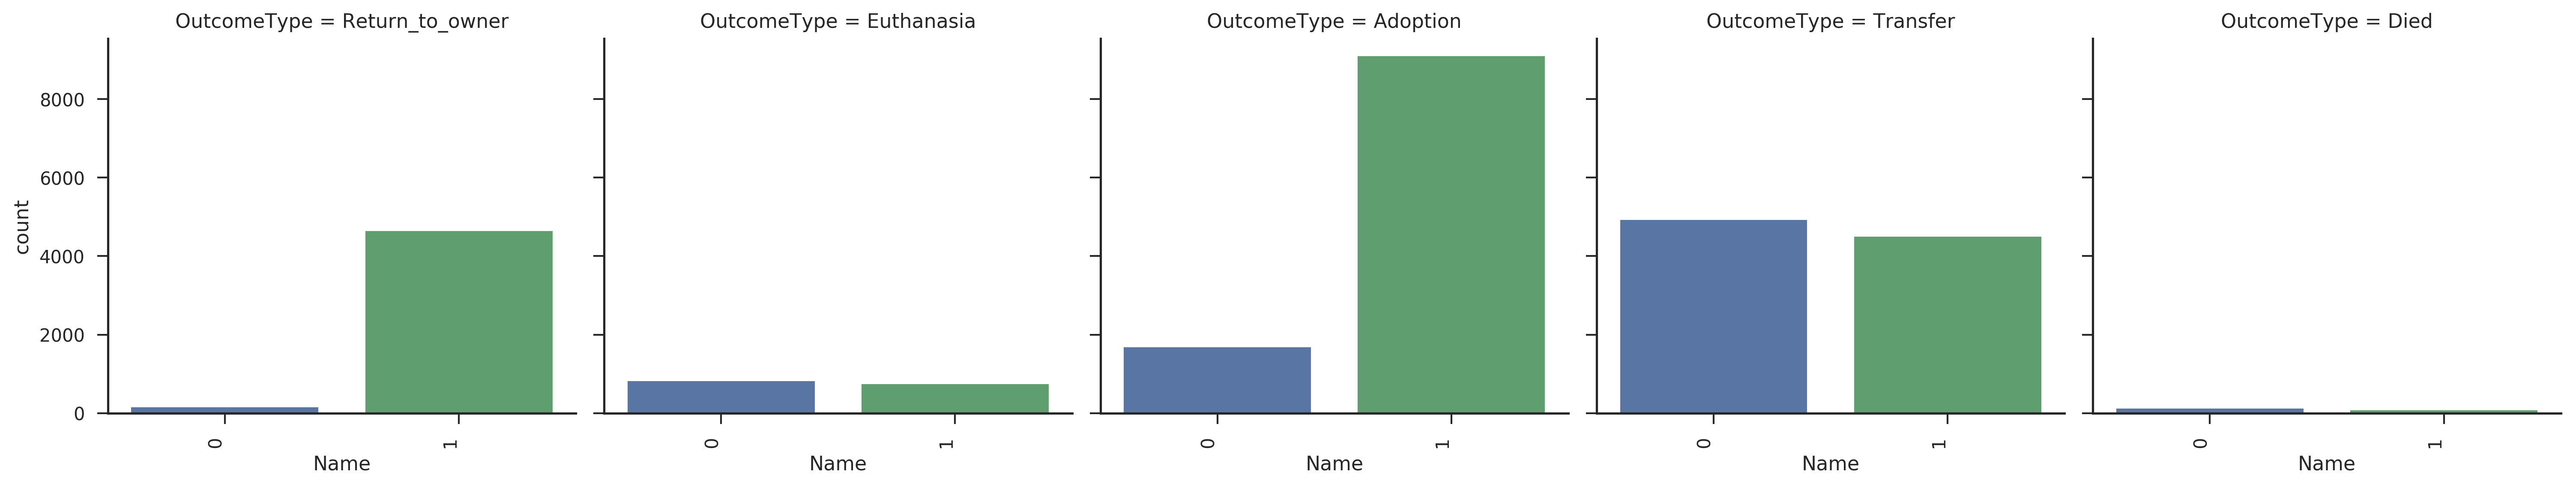

In [12]:
import seaborn as sns
sns.set(style="ticks")
ax = sns.factorplot(x="Name", col="OutcomeType", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

## - 2.3 Color (전처리)
- Color는 약 366종류로 다양하게 분포되어 있으며, 비슷하거나 mix된 경우도 많다. <br> 따라서 메인 색상(대표하는 색, 믹스된 경우 먼저 나온 색상을 사용)만을 남겨놓고 통합했다.<br><font color="blue">예시) 'Brown Tabby/White' --> 'Brown'</font><br>
- 그 결과 <font color="red">366종의 컬러를 25종으로</font> 줄일 수 있었다.

In [13]:
len(df['Color'].unique())

366

In [14]:
# 'A/B' = 'A'로 표기
def color_del(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    else:
        return x

In [15]:
df_pre['Color_pre'] = df['Color'].copy()

In [16]:
df_pre['Color_pre'] = df_pre['Color_pre'].apply(color_del)

In [17]:
df_pre.tail(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown Tabby


In [18]:
# 대표 컬러로 통합
def color_union(x):
    if 'Black' in x:
        x = 'Black'
        return x
    elif 'Blue' in x:
        x = 'Blue'
        return x
    elif 'Red' in x:
        x = 'Red'
        return x
    elif 'Silver' in x:
        x = 'Silver'
        return x
    elif 'Brown' in x:
        x = 'Brown'
        return x
    elif 'Orange' in x:
        x = 'Orange'
        return x
    elif 'Cream' in x:
        x = 'Cream'
        return x
    elif 'Gray' in x:
        x = 'Gray'
        return x
    elif 'Calico' in x:
        x = 'Calico'
        return x
    elif 'Chocolate' in x:
        x = 'Chocolate'
        return x
    elif 'Tortie' in x:
        x = 'Tortie'
        return x
    elif 'Yellow' in x:
        x = 'Yellow'
        return x
    elif 'Liver' in x:
        x = 'Liver'
        return x
    else:
        return x

In [19]:
df_pre['Color_pre'] = df_pre['Color_pre'].apply(color_union)

In [20]:
# 40마리 이하인 색깔은 'etc'로 통합
df_pre['Color_pre'] = df_pre['Color_pre'].replace('Agouti', 'etc')
df_pre['Color_pre'] = df_pre['Color_pre'].replace('Apricot', 'etc')
df_pre['Color_pre'] = df_pre['Color_pre'].replace('Lilac Point', 'etc')
df_pre['Color_pre'] = df_pre['Color_pre'].replace('Pink', 'etc')
df_pre['Color_pre'] = df_pre['Color_pre'].replace('Ruddy', 'etc')

In [21]:
df_pre.groupby(['Color_pre']).count()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Color_pre,,,,,,,,,,,,,,,
Black,6646,6646,6646,6646,3240,6646,6646,6641,6646,6646,6646,6646,6646,6646,6646
Blue,2149,2149,2149,2149,1194,2149,2149,2146,2149,2149,2149,2149,2149,2149,2149
Brown,5318,5318,5318,5318,2800,5318,5317,5313,5318,5318,5318,5318,5318,5318,5318
Buff,267,267,267,267,93,267,267,267,267,267,267,267,267,267,267
Calico,579,579,579,579,381,579,579,579,579,579,579,579,579,579,579
Chocolate,469,469,469,469,172,469,469,469,469,469,469,469,469,469,469
Cream,498,498,498,498,279,498,498,497,498,498,498,498,498,498,498
Fawn,209,209,209,209,85,209,209,209,209,209,209,209,209,209,209
Flame Point,85,85,85,85,49,85,85,85,85,85,85,85,85,85,85


In [22]:
print(len(df['Color'].value_counts()))
print(len(df_pre['Color_pre'].value_counts()))

366
25


## - 2.4 AgeuponOutcome (단위 통일)
- 중구난방인 단위의 나이 데이터들을 모두 한 단위, day로 통일시켜 주었다.

In [23]:
def DayuponOutcome(age_str):
    num, unit = age_str.split(' ')
    if unit == 'day' or unit == 'days':
        return( int(num) )
    elif unit == 'week' or unit == 'weeks':
        return(int(num) * 7 )
    elif unit == 'month' or unit == 'months':
        return(int(num) * 30 )
    elif unit == 'year' or unit == 'years':
        return(int(num) * 365 )

In [24]:
df_pre['DayuponOutcome'] = df_pre['AgeuponOutcome'].copy()
df_pre['DayuponOutcome'] = df_pre['DayuponOutcome'].fillna('0 day')
df_pre['DayuponOutcome'] = df_pre['DayuponOutcome'].apply(DayuponOutcome)

In [25]:
df_pre['AgeuponOutcome'].fillna('Unknown', inplace=True)

In [26]:
df_pre['DayuponOutcome'].describe()

count    26729.000000
mean       793.595982
std       1082.661580
min          0.000000
25%         60.000000
50%        365.000000
75%       1095.000000
max       7300.000000
Name: DayuponOutcome, dtype: float64

In [27]:
def Age(x):
    if 0 < x < 730:
        return 2
    elif 731 < x < 1460:
        return 4
    elif 1461 < x < 2190:
        return 6
    elif 2191 < x < 2920:
        return 8
    elif 2921 < x < 3650:
        return 10
    elif 3651 < x < 4380:
        return 12
    elif 4381 < x < 5110:
        return 14
    elif 5111 < x < 5840:
        return 16
    elif 5841 < x < 6570:
        return 18
    else:
        return 20    

In [28]:
df_pre['AboutAge'] = df_pre['DayuponOutcome'].copy()
df_pre['AboutAge'] = df_pre['AboutAge'].apply(Age)

In [29]:
df_pre.tail(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2


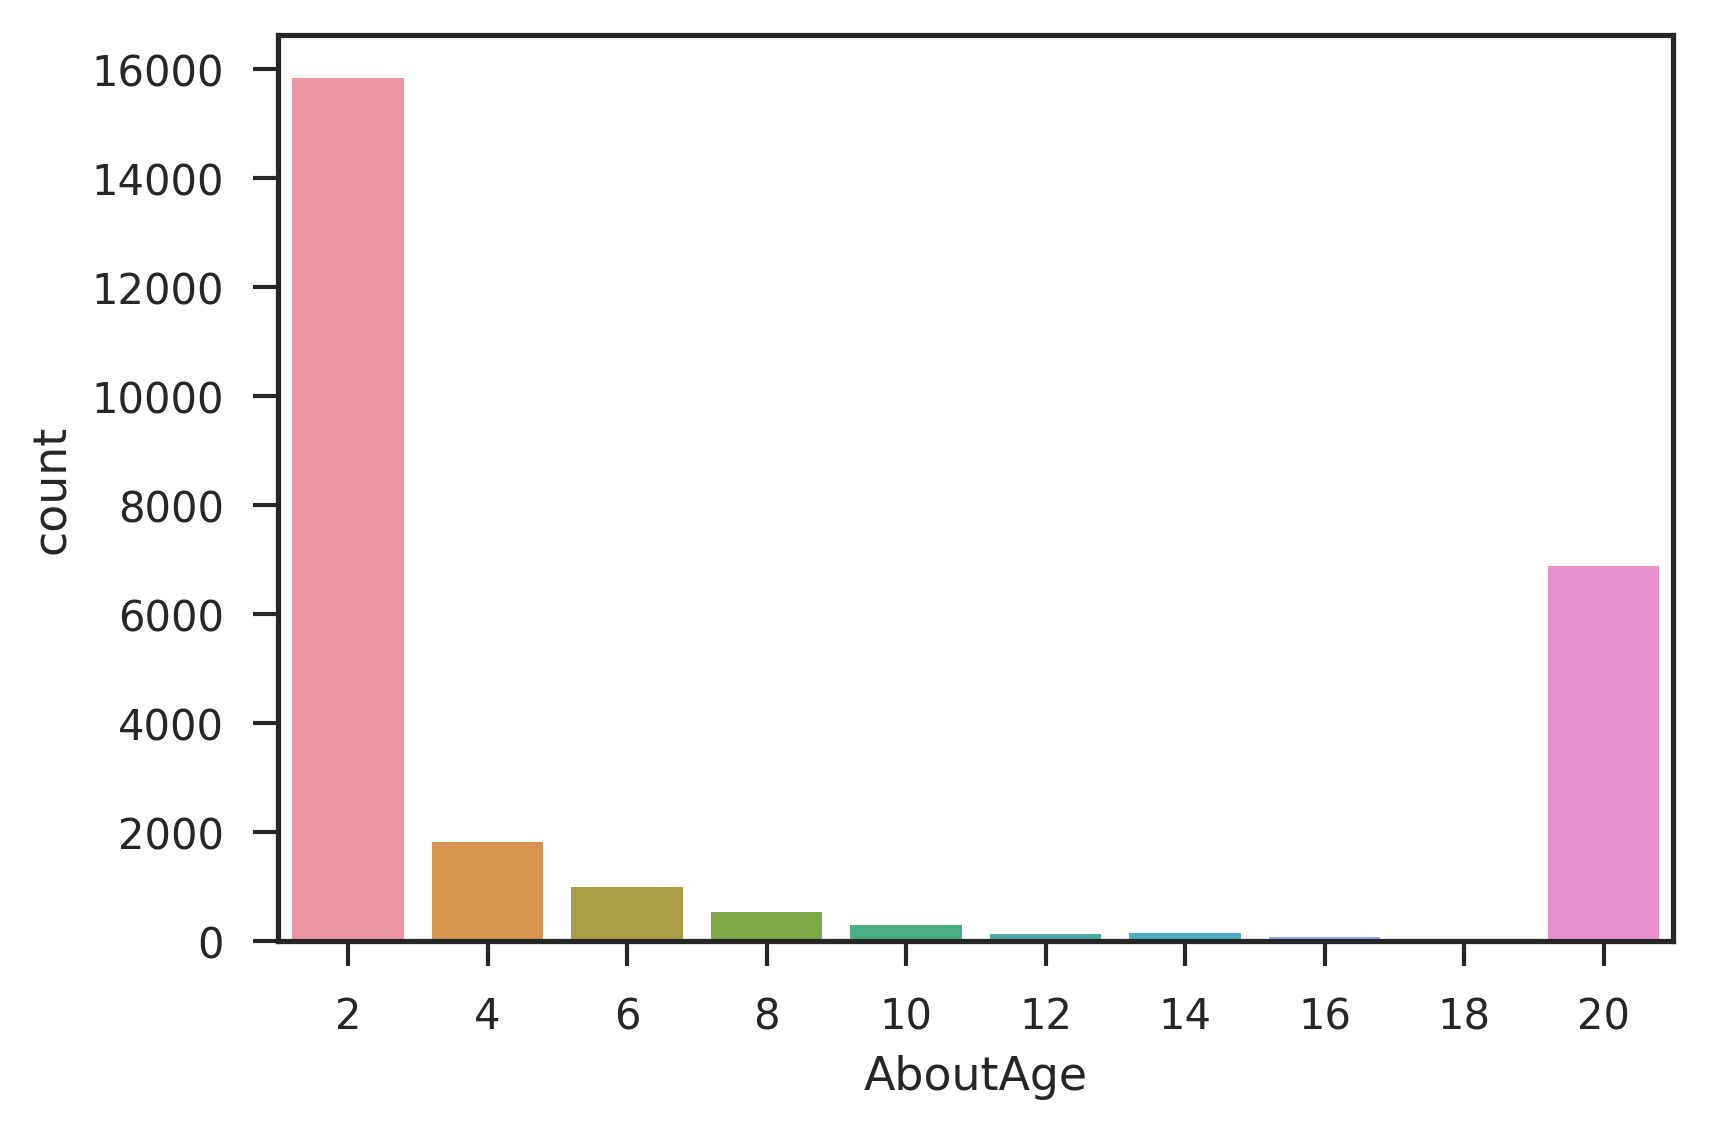

In [30]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="AboutAge", data=df_pre)

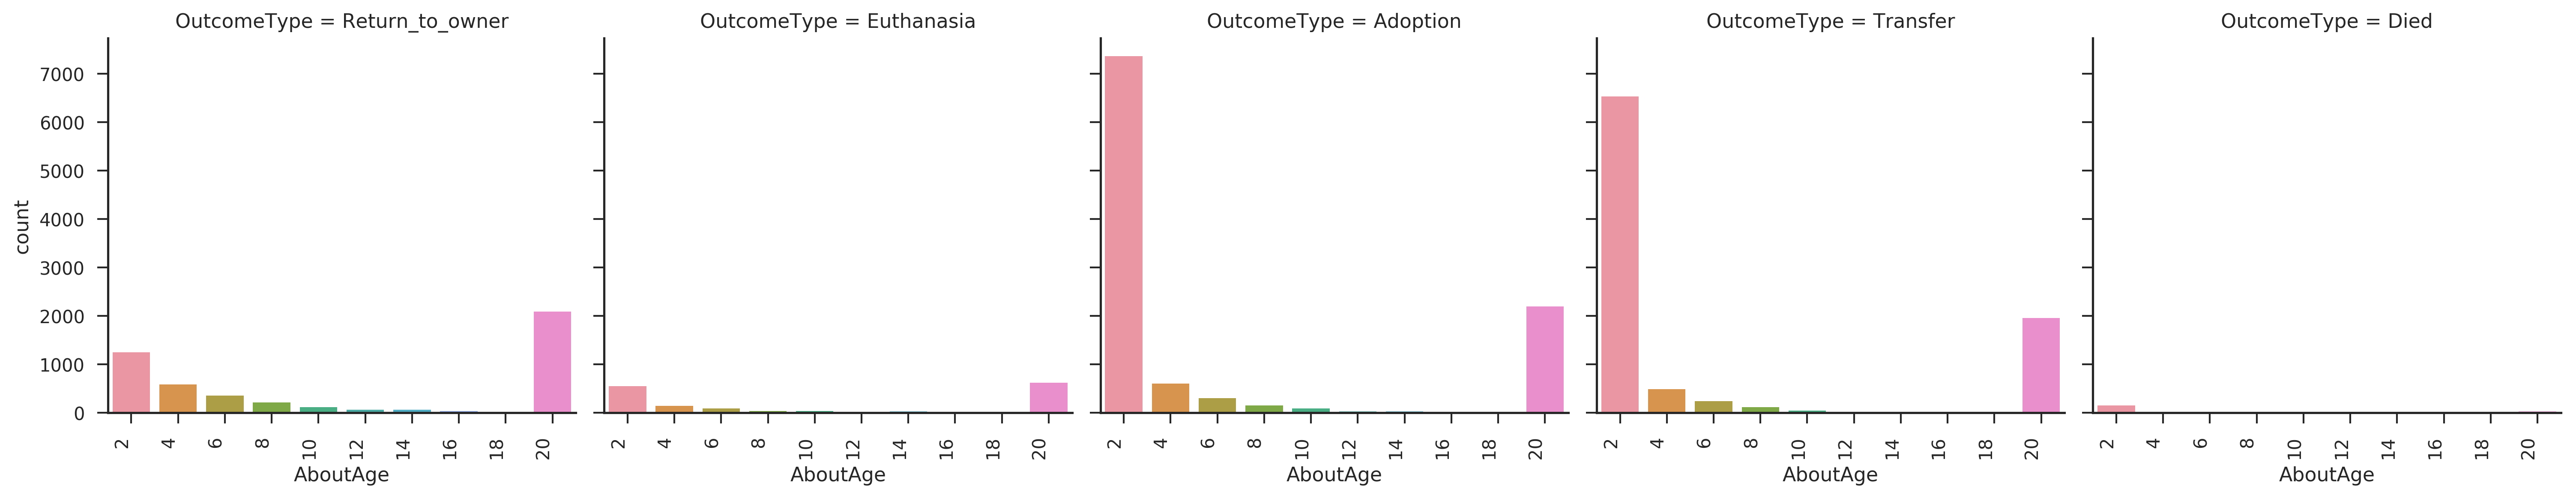

In [31]:
sns.set(style="ticks")
ax = sns.factorplot(x="AboutAge", col="OutcomeType", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

## - 2.5 Breed (전처리)
- Mix는 별도의 컬럼으로 만들어 binarize(mix는 1, 순종은 0)

In [32]:
def BreedMix(x):
    if '/' in  x:
        return 1
    elif 'Mix' in x:
        return 1
    else:
        return 0

In [33]:
df_pre['BreedMix'] = df_pre['Breed'].apply(BreedMix)

In [34]:
def Nature_Breed(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    elif ' Mix' in x:
        x = x[0:-4]
        return x
    else:
        return x

In [35]:
df_pre['Breed_pre'] = df_pre['Breed'].copy()

In [36]:
df_pre['Breed_pre'] = df_pre['Breed_pre'].apply(Nature_Breed)

In [37]:
df_pre.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre
0,A671945,1,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,0,1,0,Brown,365,2,1,Shetland Sheepdog
1,A656520,1,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,0,0,1,0,0,Cream,365,2,1,Domestic Shorthair
2,A686464,1,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,0,0,0,Blue,730,20,1,Pit Bull
3,A683430,0,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0,0,0,1,Blue,21,2,1,Domestic Shorthair
4,A667013,0,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,0,0,0,1,Tan,730,20,1,Lhasa Apso


In [38]:
df_pre.groupby(['AnimalType', 'Breed_pre']).count()

AnimalID  Name  DateTime  OutcomeType  OutcomeSubtype  SexuponOutcome  AgeuponOutcome  Breed  Color  Adoption  Died  Euthanasia  Return_to_owner  Transfer  Color_pre  DayuponOutcome  AboutAge  BreedMix
AnimalType Breed_pre                                                                                                                                                                                                                                    
Cat        Abyssinian                                 2     2         2            2               0               2               2      2      2         2     2           2                2         2          2               2         2         2
           American Shorthair                         9     9         9            9               8               9               9      9      9         9     9           9                9         9          9               9         9         9
           Angora                                     7     7         7            7               3               7               7      7      7         7     7           7                7         7          7               7         7         7
           Balinese                                   5     5         5            5               4               5               5      5      5         5     5           5                5         5          5               5         5         5
           Bengal                                     5     5         5            5               1               5               5      5      5         5     5           5                5         5          5               5         5         5
           Bombay                                     5     5         5            5               1               5               5      5      5         5     5           5                5         5          5               5         5         5
           British Shorthair                          4     4         4            4               2               4               4      4      4         4     4           4                4         4          4               4         4         4
           Burmese                                    1     1         1            1               0               1               1      1      1         1     1           1                1         1          1               1         1         1
           Cornish Rex                                1     1         1            1               0               1               1      1      1         1     1           1                1         1          1               1         1         1
           Cymric                                     2     2         2            2               2               2               2      2      2         2     2           2                2         2          2               2         2         2
           Devon Rex                                  2     2         2            2               1               2               2      2      2         2     2           2                2         2          2               2         2         2
           Domestic Longhair                        547   547       547          547             339             547             547    547    547       547   547         547              547       547        547             547       547       547
           Domestic Medium Hair                     883   883       883          883             606             883             883    883    883       883   883         883              883       883        883             883       883       883
           Domestic Shorthair                      8958  8958      8958         8958            6130            8958            8958   8958   8958      8958  8958        8958             8958      8958       8958            8958      8958      8958
           Exotic Shorthair                           2     2  

In [39]:
df_pre.groupby(['Breed_pre', 'AboutAge']).count()

AnimalID  Name  DateTime  OutcomeType  OutcomeSubtype  AnimalType  SexuponOutcome  AgeuponOutcome  Breed  Color  Adoption  Died  Euthanasia  Return_to_owner  Transfer  Color_pre  DayuponOutcome  BreedMix
Breed_pre                          AboutAge                                                                                                                                                                                                             
Abyssinian                         2                2     2         2            2               0           2               2               2      2      2         2     2           2                2         2          2               2         2
Affenpinscher                      2                2     2         2            2               1           2               2               2      2      2         2     2           2                2         2          2               2         2
                                   4                1     1         1            1               0           1               1               1      1      1         1     1           1                1         1          1               1         1
                                   20               3     3         3            3               0           3               3               3      3      3         3     3           3                3         3          3               3         3
Afghan Hound                       20               1     1         1            1               0           1               1               1      1      1         1     1           1                1         1          1               1         1
Airedale Terrier                   2                4     4         4            4               1           4               4               4      4      4         4     4           4                4         4          4               4         4
                                   8                1     1         1            1               1           1               1               1      1      1         1     1           1                1         1          1               1         1
                                   20               3     3         3            3               2           3               3               3      3      3         3     3           3                3         3          3               3         3
Akita                              2                5     5         5            5               2           5               5               5      5      5         5     5           5                5         5          5               5         5
                                   4                3     3         3            3               0           3               3               3      3      3         3     3           3                3         3          3               3         3
                                   6                1     1         1            1               0           1               1               1      1      1         1     1           1                1         1          1               1         1
                                   8                1     1         1            1               0           1               1               1      1      1         1     1           1                1         1          1               1         1
                                   20              11    11        11           11               4          11              11              11     11     11        11    11          11               11        11         11              11        11
Alaskan Husky                      2                6     6         6            6               2           6               6               6      6      6         6     6           6                6         6          6               6         6
                                   4                1     1  

## - 2.6 AnimalType (Binarize)
- dog는 1, cat은 0

In [40]:
encoder = LabelEncoder()
df_pre['AnimalType'] = encoder.fit_transform(df['AnimalType'])

In [41]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre
26724,A702446,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair
26725,A718934,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair
26726,A698128,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog
26727,A677478,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair
26728,A706629,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair


In [42]:
df_pre['AnimalType'].value_counts()

1    15595
0    11134
Name: AnimalType, dtype: int64

## - 2.7 SexuponOutcome
- Nan값을 Unknown으로 처리

In [43]:
df_pre['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [44]:
df_pre['SexuponOutcome'].fillna("Unknown", inplace=True)

In [45]:
df_pre['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1094
Name: SexuponOutcome, dtype: int64

## - 2.8 AnimalID (string제거, 정수화)

In [46]:
df_pre['AnimalID'] = encoder.fit_transform(df['AnimalID'])

In [47]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair


## -2.9 DateTime 전처리 및 분석

In [48]:
import re

In [49]:
def MakeYear(x):
    A = re.search(r'\d\d\d\d', str(x))
    return A.group()

In [50]:
df_pre['Year'] = df_pre['DateTime'].apply(MakeYear)

In [51]:
def MakeMonth(x):
    A = re.search(r'-\d\d-', str(x))
    B = re.search(r'\d\d', str(A))
    return B.group()

In [52]:
df_pre['Month'] = df_pre['DateTime'].apply(MakeMonth)

In [53]:
df_pre['YearMonth'] = df_pre['Year'] + df_pre['Month']

In [54]:
def Integerize(x):
    x = int(x)
    return x

In [55]:
df_pre['YearMonth'] = df_pre['YearMonth'].apply(Integerize)

In [56]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507


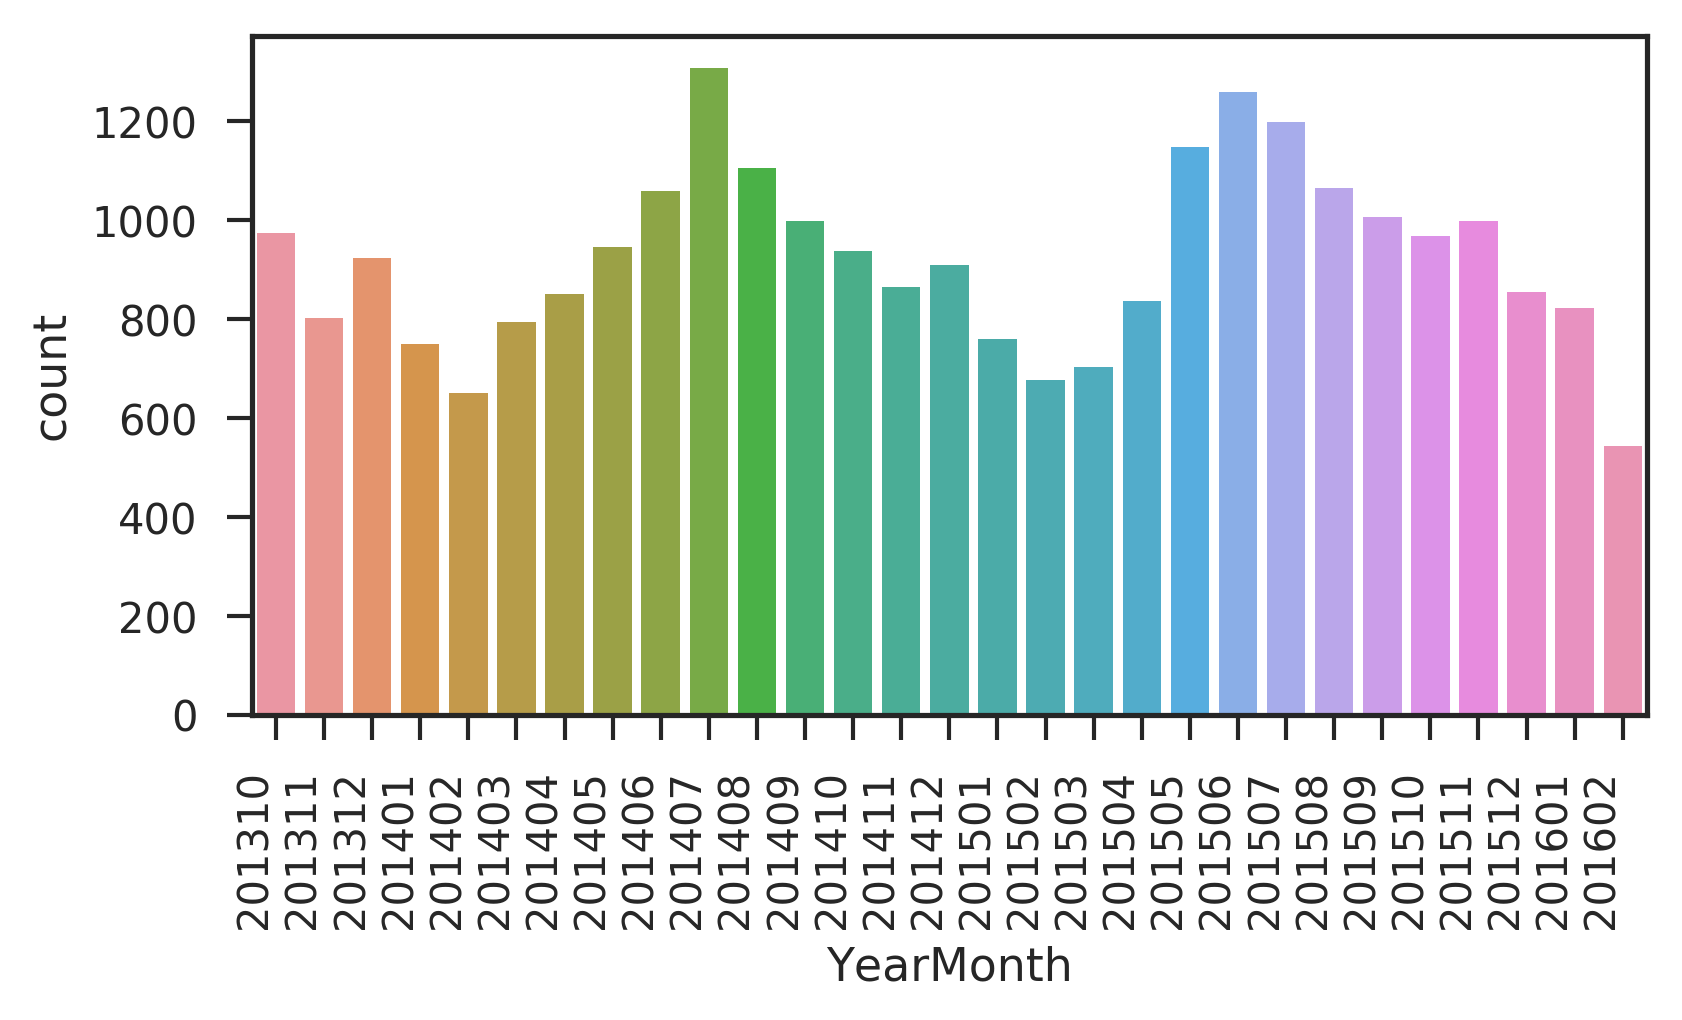

In [57]:
import seaborn as sns
plt.figure(figsize=(6,3))
ax = sns.countplot(x="YearMonth", data=df_pre, order=[201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602])
ax.set_xticklabels(labels=[201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602], rotation=90, ha="right")

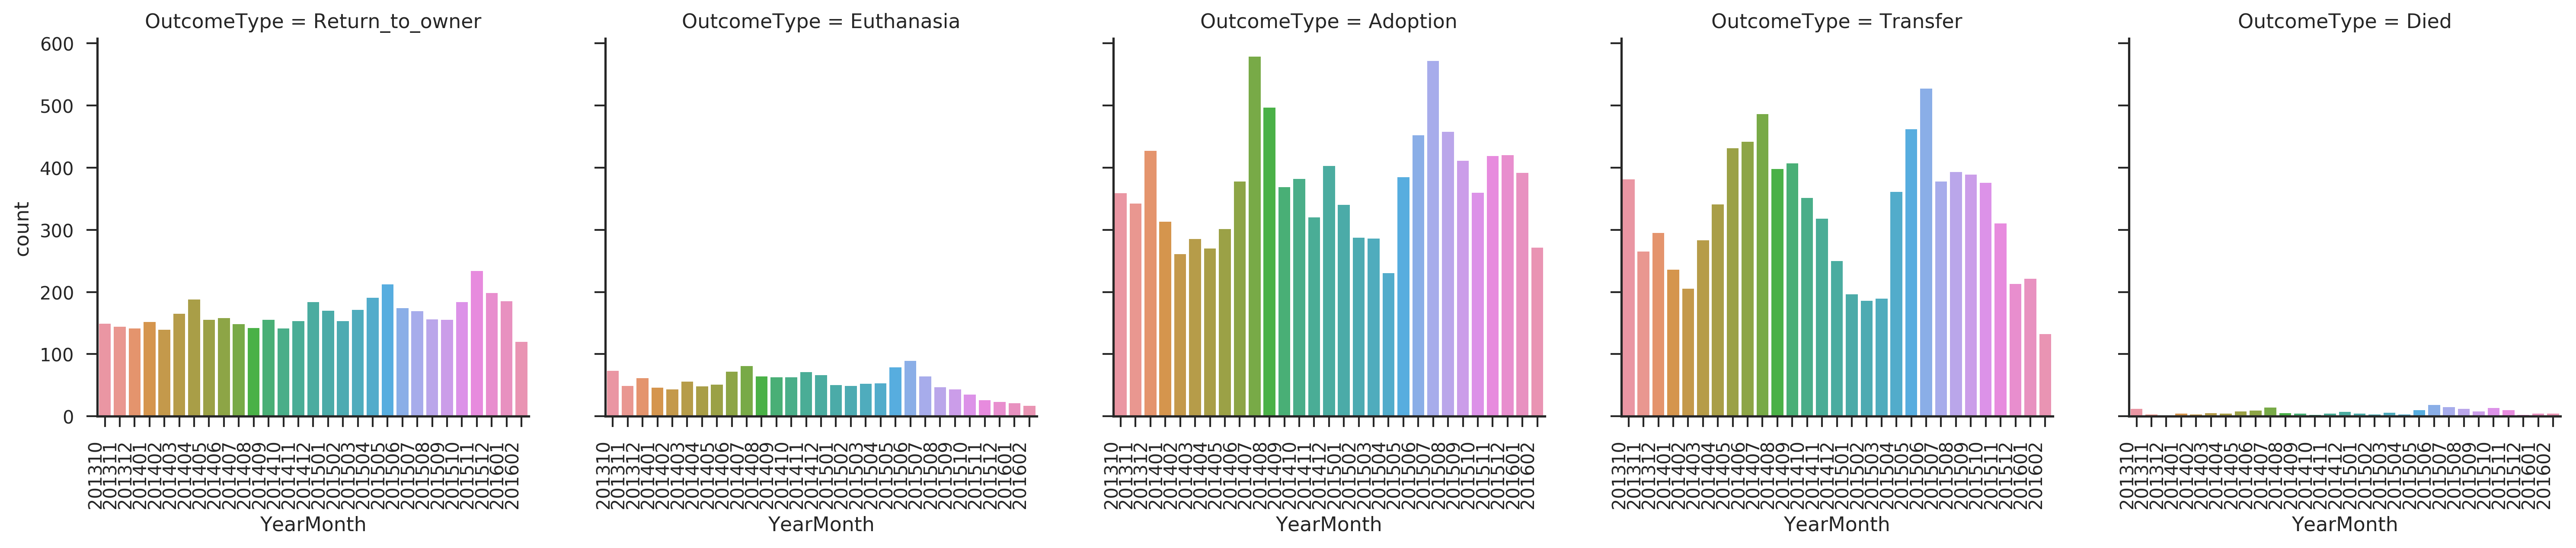

In [58]:
sns.set(style="ticks")
ax = sns.factorplot(x="YearMonth", col="OutcomeType", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

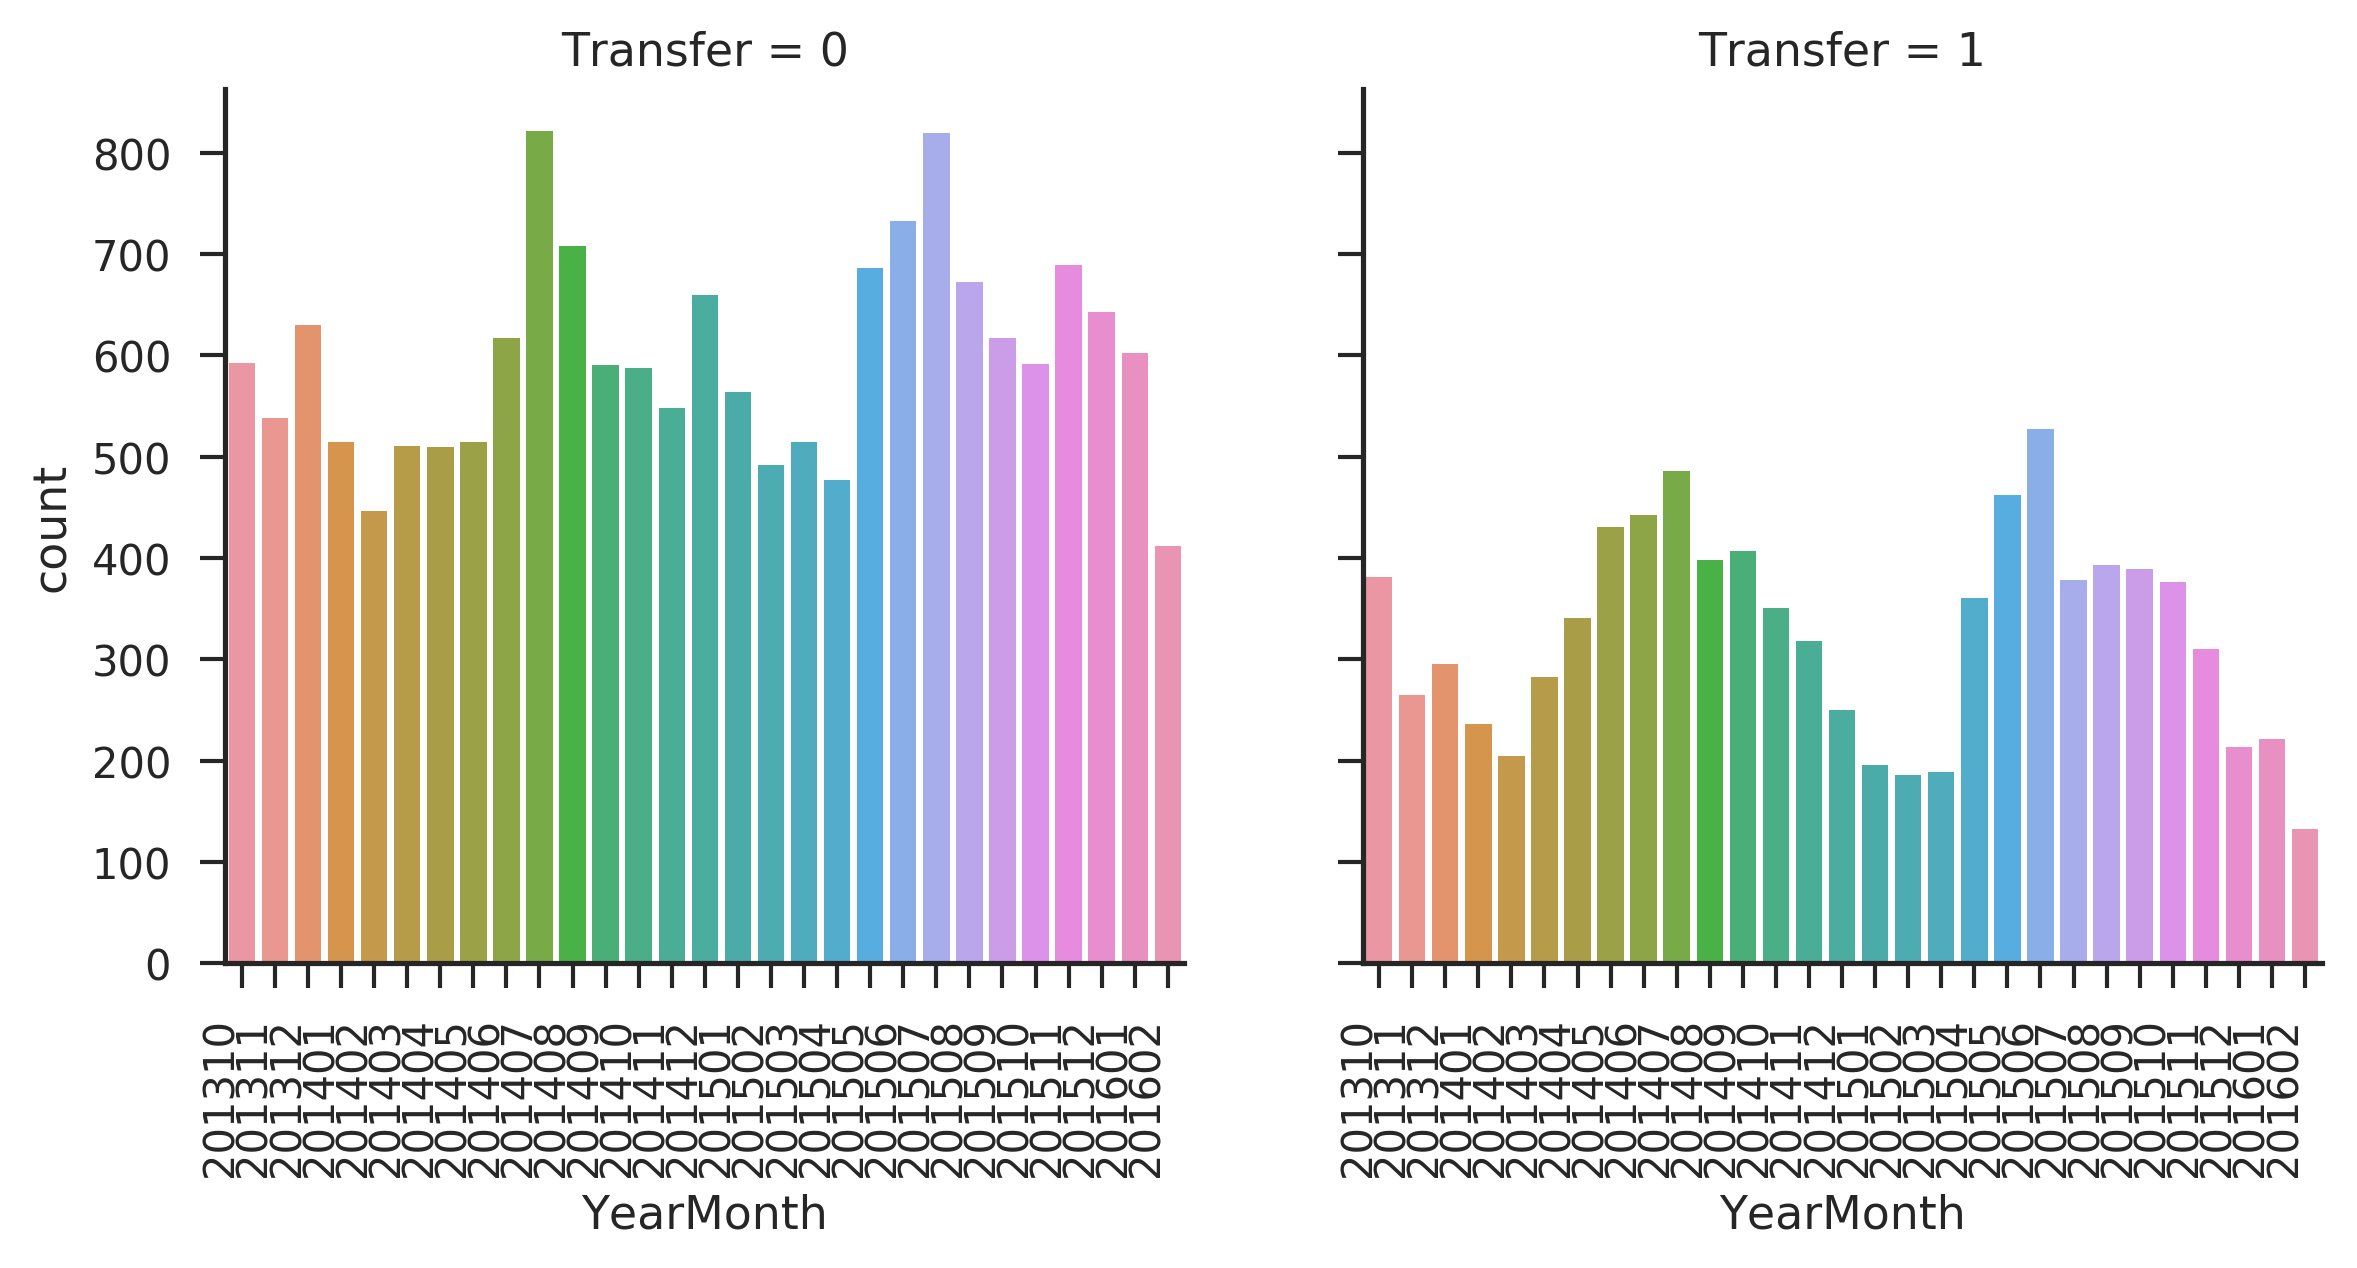

In [59]:
sns.set(style="ticks")
ax = sns.factorplot(x="YearMonth", col="Transfer", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

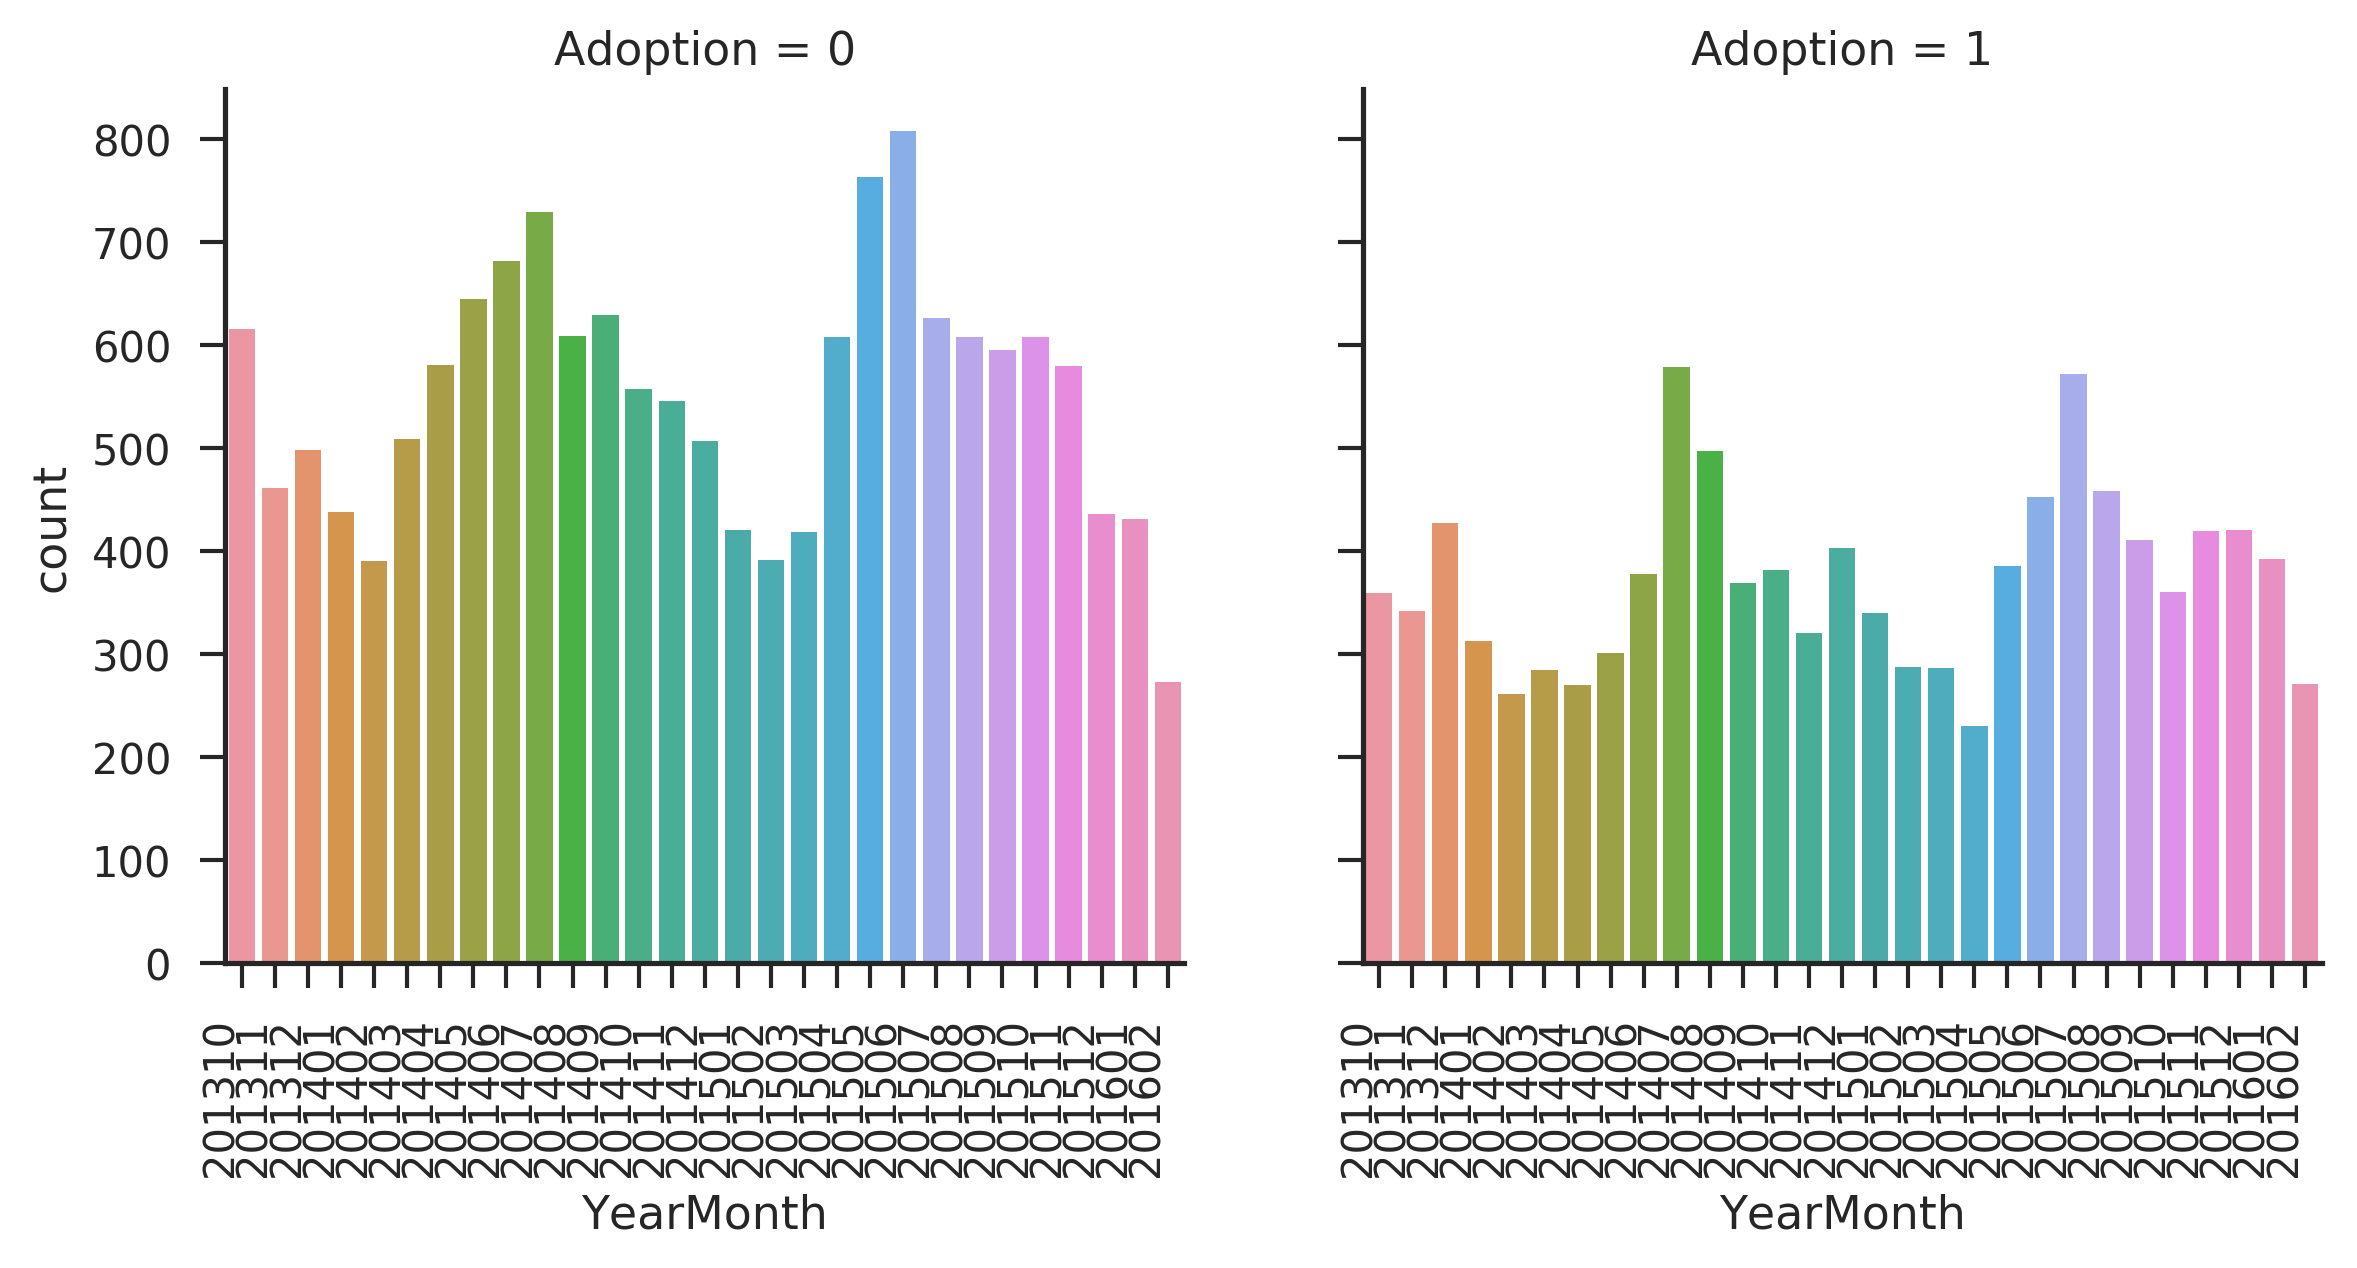

In [60]:
sns.set(style="ticks")
ax = sns.factorplot(x="YearMonth", col="Adoption", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

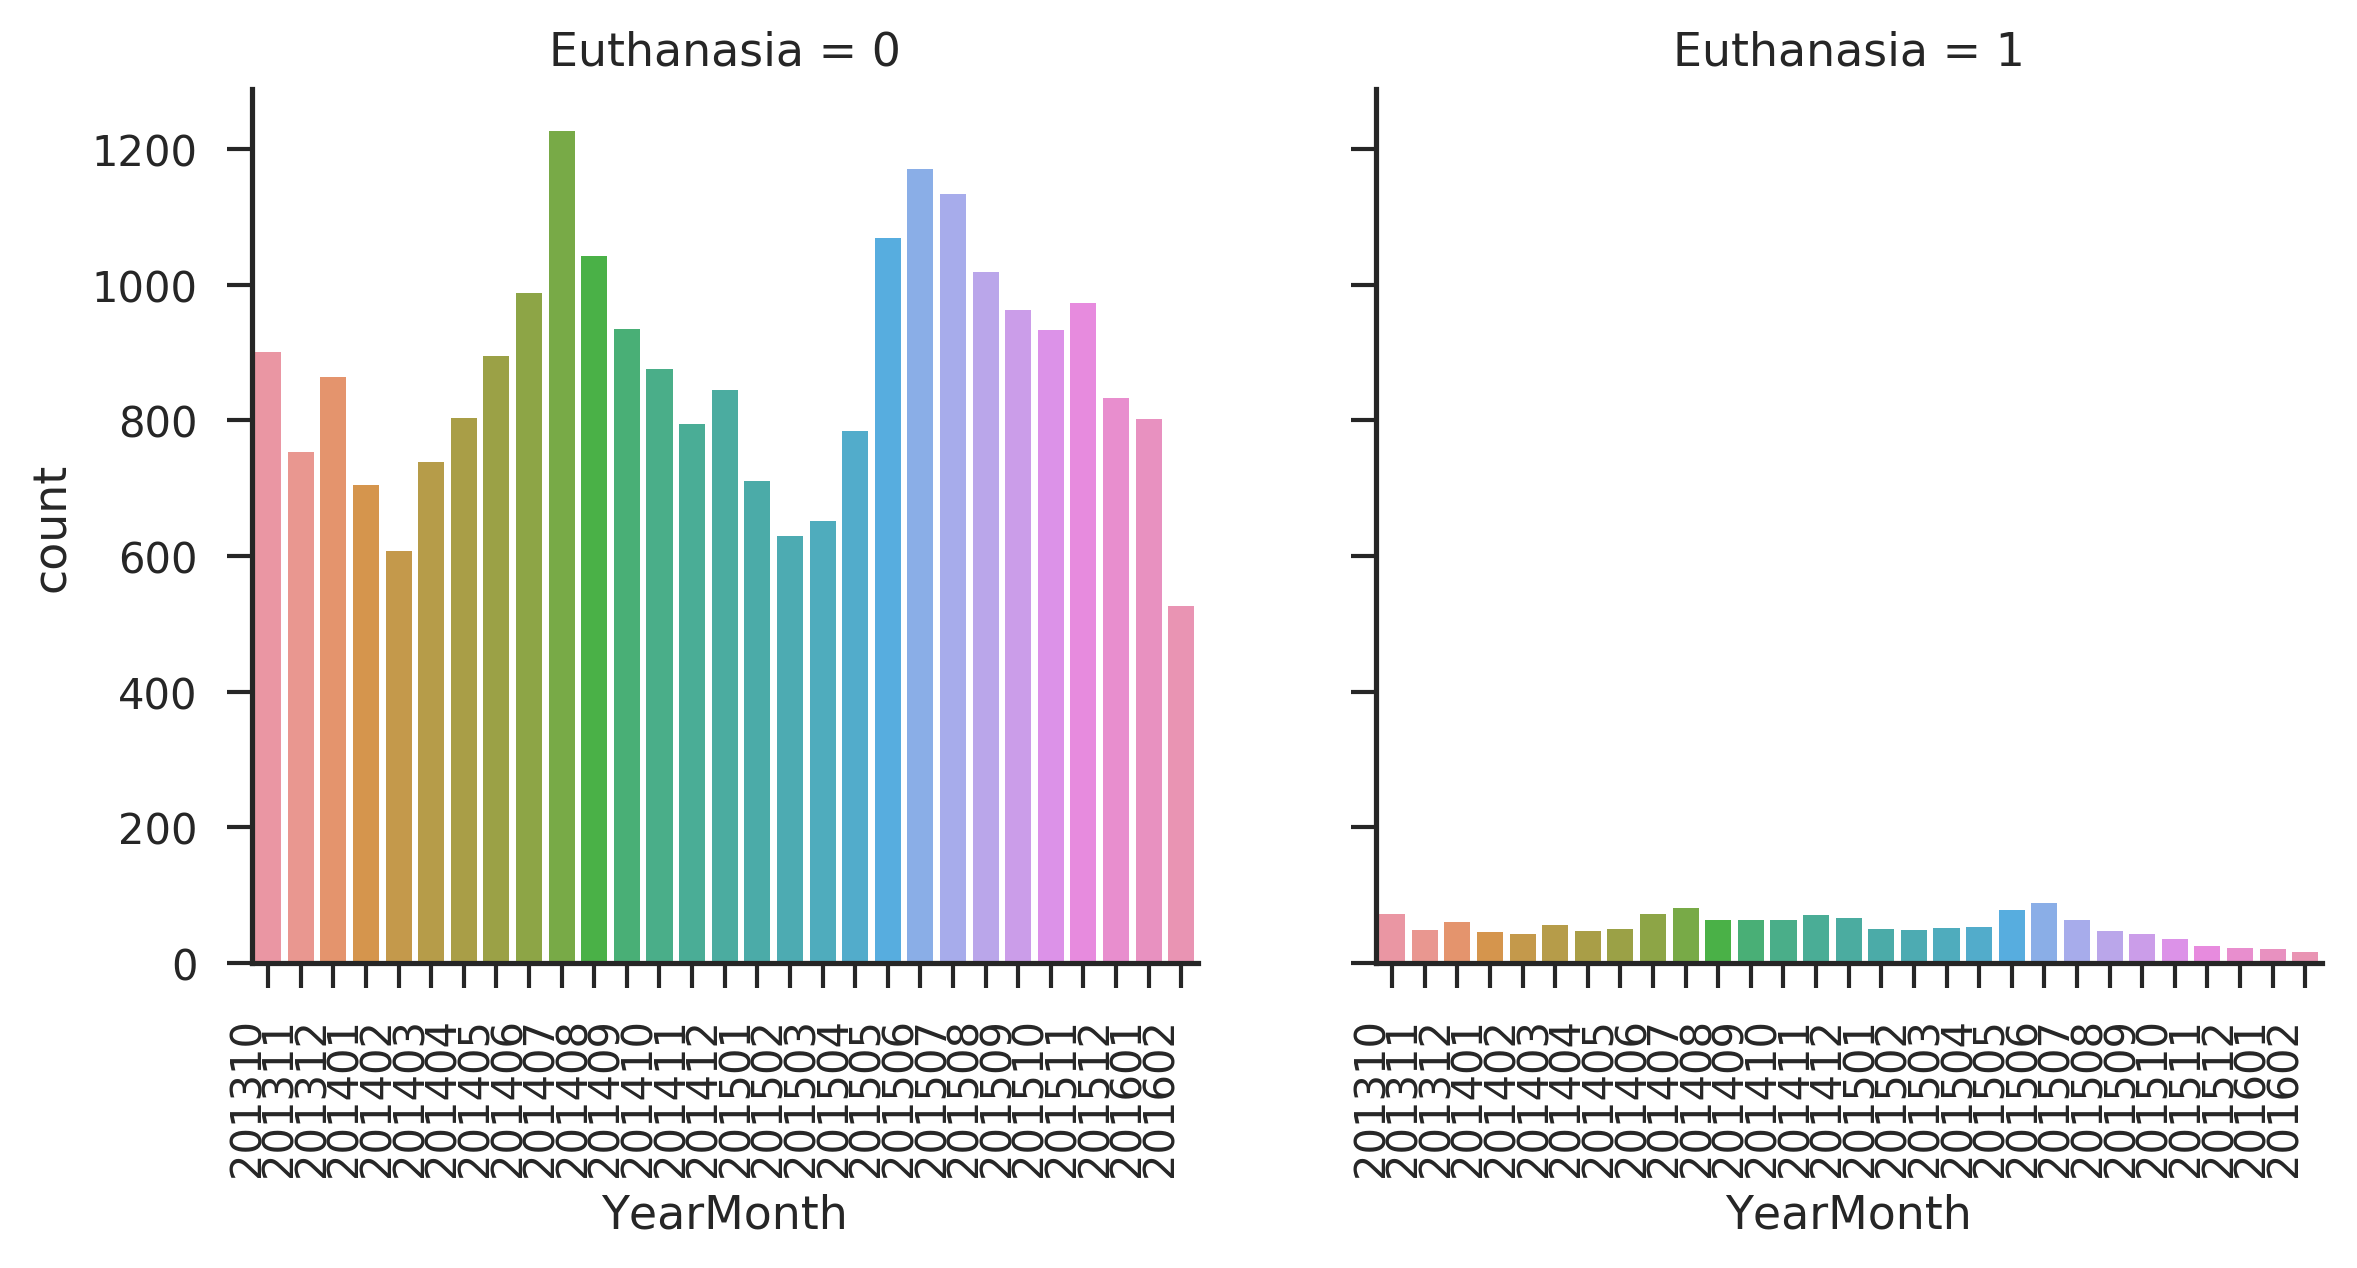

In [61]:
sns.set(style="ticks")
ax = sns.factorplot(x="YearMonth", col="Euthanasia", data=df_pre, kind='count' )
ax.set_xticklabels(rotation=90, ha="right")

### 2.9.1 DateTime을 계절로 변환하여 추가

In [62]:
df_pre['Season'] = df_pre['Month'].copy()

In [63]:
df_pre['Season'] = df_pre['Season'].apply(Integerize)

In [64]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505,5
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601,1
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503,3
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404,4
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507,7


In [65]:
def Seasonerize(x):
    if x == 12 or x == 1 or x == 2:
        return 'Winter'
    elif 2 < x < 6:
        return 'Spring'
    elif 5 < x < 9:
        return 'Summer'
    elif 8 < x < 12:
        return 'Automn'
    else:
        return 'Unknown'    

In [66]:
df_pre['Season'] = df_pre['Season'].apply(Seasonerize)
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505,Spring
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601,Winter
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503,Spring
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404,Spring
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507,Summer


In [67]:
df_pre['Season'].value_counts()

Automn    7553
Summer    6997
Winter    6898
Spring    5281
Name: Season, dtype: int64

### 2.9.2 DateTime을 분기로 변환하여 추가

In [68]:
df_pre['Quarter'] = df_pre['Month'].copy()

In [69]:
df_pre['Quarter'] = df_pre['Quarter'].apply(Integerize)

In [70]:
def Quarterize(x):
    if 0 < x < 4:
        return '1/4'
    elif 3 < x < 7:
        return '2/4'
    elif 6 < x < 10:
        return '3/4'
    elif 9 < x < 13:
        return '4/4'
    else:
        return 'Unknown'    

In [71]:
df_pre['Quarter'] = df_pre['Quarter'].apply(Quarterize)
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505,Spring,2/4
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601,Winter,1/4
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503,Spring,1/4
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404,Spring,2/4
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507,Summer,3/4


In [72]:
df_pre['Quarter'].value_counts()

4/4    8240
3/4    6682
2/4    6102
1/4    5705
Name: Quarter, dtype: int64

## - 2.10 성향 그룹 추가
- 동물의 성향이 Adoption에 영향을 미칠 것이다.
- 강아지의 성향 기준은 American Kennel Club(AKC), United Kennel Club (UKC)의 기준을 크롤링해서 dataframe화 했다.

In [73]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


info_url = 'http://www.akc.org/public-education/resources/dog-breeds-sorted-groups/'
response = requests.get(info_url)
soup = BeautifulSoup(response.content.decode('latin1'), 'lxml')
breed_group = list()
group_element = list()

groups = soup.select('h2')
for group in groups:
    breed_group.append(group.get_text())


group_element = breed_group
group_element

['HERDING GROUP',
 'HOUND GROUP',
 'TOY GROUP',
 'NON-SPORTING GROUP',
 'SPORTING GROUP',
 'TERRIER GROUP',
 'WORKING GROUP',
 'MISCELLANEOUS CLASS']

In [74]:
group_lists = soup.select('ol')

dog_list = list()
for num,group_list in enumerate(group_lists):
    group_lst = group_list.select('li')
    breed_group[num] = list()
    for dog_breeds in group_lst:
        dog_breed = dog_breeds.find('a')
        breed_group[num].append(dog_breed.get_text())

In [75]:
breed_group

[['Australian Cattle Dog',
  'Australian Shepherd',
  'Bearded Collie',
  'Beauceron',
  'Belgian Malinois',
  'Belgian Sheepdog',
  'Belgian Tervuren',
  'Bergamasco',
  'Berger Picard',
  'Border Collie',
  'Bouvier des Flandres',
  'Briard',
  'Canaan Dog',
  'Cardigan Welsh Corgi',
  'Collie',
  'Entlebucher Moutain Dog',
  'Finnish Lapphund',
  'German Shepherd Dog',
  'Icelandic Sheepdog',
  'Miniature American Shepherd',
  'Norwegian Buhund',
  'Old English Sheepdog',
  'Pembroke Welsh Corgi',
  'Polish Lowland Sheepdog',
  'Puli',
  'Pumi',
  'Pyrenean Sheepdog',
  'Shetland Sheepdog',
  'Spanish Water Dog',
  'Swedish Vallhund'],
 ['Afghan Hound',
  'American English Coonhound',
  'American Foxhound',
  'Basenji',
  'Basset Hound',
  'Beagle',
  'Black and Tan Coonhound',
  'Bloodhound',
  'Bluetick Coonhound',
  'Borzoi',
  'Cirneco Dell’Etna',
  'Dachshund',
  'English Foxhound',
  'Greyhound',
  'Harrier',
  'Ibizan Hound',
  'Irish Wolfhound',
  'Norwegian Elkhound',
  'Ot

- Manchester Terrier가 중복기입 되어있어서 Toy Group에서 제외.

In [76]:
breed_group[2].remove("Manchester Terrier")

<br>- 기준에는 없지만 동물 수가 많아서 분류가 필요한 종들은 구글링을 통해서 추가로 분류해줬다.

In [77]:
breed_group[0].append('Catahoula')
breed_group[0].append('German Shepherd')
breed_group[2].append('Chihuahua Shorthair')
breed_group[3].append('Miniature Poodle')
breed_group[5].append('Jack Russell Terrier')
breed_group[5].append('Pit Bull')

In [78]:
df_herding = pd.DataFrame(breed_group[0], columns=['Breed_pre'])
df_herding["Group"] = "Herding Group"

df_hound = pd.DataFrame(breed_group[1], columns=['Breed_pre'])
df_hound["Group"] = "Hound Group"

df_toy = pd.DataFrame(breed_group[2], columns=['Breed_pre'])
df_toy["Group"] = "Toy Group"

df_non_sporting = pd.DataFrame(breed_group[3] , columns=['Breed_pre'])
df_non_sporting["Group"] = "Non_Sporting Group"

df_sporting = pd.DataFrame(breed_group[4], columns=['Breed_pre'])
df_sporting["Group"] = "Sporting Group"

df_terrier = pd.DataFrame(breed_group[5], columns=['Breed_pre'])
df_terrier["Group"] = "Terrier Group"

df_working = pd.DataFrame(breed_group[6], columns=['Breed_pre'])
df_working["Group"] = "Working Group"

df_miscellaneous = pd.DataFrame(breed_group[7], columns=['Breed_pre'])
df_miscellaneous["Group"] = "Miscellaneous Class"

df_cat1 = pd.DataFrame({'Breed_pre' : ['Domestic Shorthair'],'Group': ['cat1']})
df_cat2 = pd.DataFrame({'Breed_pre' : ['Domestic Medium Hair'],'Group': ['cat2']})
df_cat3 = pd.DataFrame({'Breed_pre' : ['Domestic Longhair'],'Group': ['cat3']})
df_cat4 = pd.DataFrame({'Breed_pre' : ['Siamese'],'Group': ['cat4']})

In [79]:
df_group_all = pd.concat([df_herding, df_hound ,df_toy ,df_non_sporting , df_sporting ,df_terrier , df_working , df_miscellaneous , df_cat1 , df_cat2 , df_cat3 , df_cat4], axis=0, ignore_index=True)
df_group_all.tail()

,Breed_pre,Group
203,Portuguese Podengo,Miscellaneous Class
204,Domestic Shorthair,cat1
205,Domestic Medium Hair,cat2
206,Domestic Longhair,cat3
207,Siamese,cat4


In [80]:
df_pre = pd.merge(df_pre, df_group_all, on = 'Breed_pre', how = 'left')
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505,Spring,2/4,cat1
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601,Winter,1/4,cat1
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503,Spring,1/4,NaN
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404,Spring,2/4,cat1
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507,Summer,3/4,cat1


In [81]:
df_pre['Group'].fillna("unknown", inplace=True)

In [82]:
print(df_pre['Group'].value_counts())

cat1                   8958
Terrier Group          3282
Toy Group              3041
Sporting Group         2329
Herding Group          2319
unknown                2268
Working Group          1059
Hound Group             947
cat2                    883
Non_Sporting Group      653
cat3                    547
cat4                    426
Miscellaneous Class      17
Name: Group, dtype: int64


In [83]:
len(df_pre)

26729

## - 2.11 크기 그룹 추가
- 동물의 크기또한 결과에 영향을 미칠 것이다.
- 강아지의 성향 기준은 American Kennel Club(AKC), United Kennel Club (UKC)의 기준을 크롤링해서 dataframe화 했다.

In [84]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

res = requests.get('https://www.petplace.com/article/dogs/pet-care/american-kennel-club-akc-breeds-by-size')
soup = BeautifulSoup(res.content, 'html.parser')

breeds_size = soup.find_all(title="'Click here for more information. '")
breeds_size_group = soup.find_all('strong')

breeds_size_list = []

i = 0
while i < 150:
    breeds_size_list.append(breeds_size[i].get_text())
    if i == 150:
        break
    i = i + 1

breeds_size_list_giant = list()
breeds_size_list_large = list()
breeds_size_list_medium = list()
breeds_size_list_small = list()
breeds_size_list_toy = list()

a = 0
while a < 17:
    breeds_size_list_giant.append(breeds_size_list[a])
    a = a + 1

a = 17
while 16 < a < 53:
    breeds_size_list_large.append(breeds_size_list[a])
    a = a + 1
    
a = 53
while 52 < a < 99:
    breeds_size_list_medium.append(breeds_size_list[a])
    a = a + 1
    
a = 99
while 98 < a < 138:
    breeds_size_list_small.append(breeds_size_list[a])
    a = a + 1
    
a = 138
while 137 < a < 150:
    breeds_size_list_toy.append(breeds_size_list[a])
    if a == 150:
        break
    a = a + 1
    
#AKC 기준 Manchester Terrier가 small그룹과 toy그룹에 중복 분류되어 있기 때문에 toy그룹에서 삭제
breeds_size_list_toy.remove("Manchester Terrier")
    
breeds_size_list_medium.append('Catahoula')
breeds_size_list_large.append('German Shepherd')
breeds_size_list_small.append('Chihuahua Shorthair')
breeds_size_list_small.append('Miniature Poodle')
breeds_size_list_small.append('Jack Russell Terrier')
breeds_size_list_medium.append('Pit Bull')

'''
print('Giant_group')
print(breeds_size_list_giant)
print('-'*50)
print('Large_group')
print(breeds_size_list_large)
print('-'*50)
print('Medium_group')
print(breeds_size_list_medium)
print('-'*50)
print('Small_group')
print(breeds_size_list_small)
print('-'*50)
print('Toy_group')
print(breeds_size_list_toy)
'''

"\nprint('Giant_group')\nprint(breeds_size_list_giant)\nprint('-'*50)\nprint('Large_group')\nprint(breeds_size_list_large)\nprint('-'*50)\nprint('Medium_group')\nprint(breeds_size_list_medium)\nprint('-'*50)\nprint('Small_group')\nprint(breeds_size_list_small)\nprint('-'*50)\nprint('Toy_group')\nprint(breeds_size_list_toy)\n"

In [85]:
df_giant = pd.DataFrame(breeds_size_list_giant, columns=['Breed_pre'])
df_giant["Size"] = "Giant"

df_large = pd.DataFrame(breeds_size_list_large, columns=['Breed_pre'])
df_large["Size"] = "Large"

df_medium = pd.DataFrame(breeds_size_list_medium, columns=['Breed_pre'])
df_medium["Size"] = "Medium"

df_small = pd.DataFrame(breeds_size_list_small, columns=['Breed_pre'])
df_small["Size"] = "Small"

df_toy = pd.DataFrame(breeds_size_list_toy, columns=['Breed_pre'])
df_toy["Size"] = "Toy"

df_cat5 = pd.DataFrame({'Breed_pre' : ['Domestic Shorthair'],'Size': ['cat1']})
df_cat6 = pd.DataFrame({'Breed_pre' : ['Domestic Medium Hair'],'Size': ['cat2']})
df_cat7 = pd.DataFrame({'Breed_pre' : ['Domestic Longhair'],'Size': ['cat3']})
df_cat8 = pd.DataFrame({'Breed_pre' : ['Siamese'],'Size': ['cat4']})

In [86]:
df_size_all = pd.concat([df_giant, df_large, df_medium, df_small, df_toy, df_cat5 , df_cat6 , df_cat7 , df_cat8], axis=0, ignore_index=True)

In [87]:
df_size_all.tail()

,Breed_pre,Size
154,Yorkshire Terrier,Toy
155,Domestic Shorthair,cat1
156,Domestic Medium Hair,cat2
157,Domestic Longhair,cat3
158,Siamese,cat4


In [88]:
df_pre = pd.merge(df_pre, df_size_all, on = 'Breed_pre', how = 'left')
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,2015-05-14 11:56:00,Transfer,Partner,0,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,30,2,1,Domestic Shorthair,2015,05,201505,Spring,2/4,cat1,cat1
26725,26055,0,2016-01-20 18:59:00,Transfer,SCRP,0,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,90,2,1,Domestic Shorthair,2016,01,201601,Winter,1/4,cat1,cat1
26726,16731,1,2015-03-09 13:33:00,Adoption,NaN,1,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,1,0,0,0,0,White,1460,20,1,Old English Bulldog,2015,03,201503,Spring,1/4,unknown,NaN
26727,7450,0,2014-04-27 12:22:00,Transfer,Partner,0,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,0,0,1,Black,28,2,1,Domestic Shorthair,2014,04,201404,Spring,2/4,cat1,cat1
26728,20751,0,2015-07-02 09:00:00,Transfer,SCRP,0,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,0,0,0,0,1,Brown,365,2,1,Domestic Shorthair,2015,07,201507,Summer,3/4,cat1,cat1


In [89]:
df_pre['Size'].fillna("unknown", inplace=True)

In [90]:
print(df_pre['Size'].value_counts())
print(len(df_pre))

cat1       8958
Medium     4303
Small      4300
Large      3321
unknown    3082
cat2        883
cat3        547
Giant       459
Toy         450
cat4        426
Name: Size, dtype: int64
26729


# 3. 모델링

In [91]:
df_pre.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
0,5419,1,2014-02-12 18:22:00,Return_to_owner,NaN,1,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,0,1,0,Brown,365,2,1,Shetland Sheepdog,2014,02,201402,Winter,1/4,Herding Group,Small
1,1603,1,2013-10-13 12:44:00,Euthanasia,Suffering,0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,0,0,1,0,0,Cream,365,2,1,Domestic Shorthair,2013,10,201310,Automn,4/4,cat1,cat1
2,11613,1,2015-01-31 12:28:00,Adoption,Foster,1,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,0,0,0,Blue,730,20,1,Pit Bull,2015,01,201501,Winter,1/4,Terrier Group,Medium
3,10238,0,2014-07-11 19:09:00,Transfer,Partner,0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0,0,0,1,Blue,21,2,1,Domestic Shorthair,2014,07,201407,Summer,3/4,cat1,cat1
4,3501,0,2013-11-15 12:52:00,Transfer,Partner,1,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,0,0,0,1,Tan,730,20,1,Lhasa Apso,2013,11,201311,Automn,4/4,Non_Sporting Group,unknown
5,7395,1,2014-04-25 13:04:00,Transfer,Partner,1,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,0,0,0,0,1,Black,30,2,1,Cairn Terrier,2014,04,201404,Spring,2/4,Terrier Group,Small
6,17151,1,2015-03-28 13:11:00,Transfer,Partner,0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,0,0,0,0,1,Blue,21,2,1,Domestic Shorthair,2015,03,201503,Spring,1/4,cat1,cat1
7,18182,0,2015-04-30 17:02:00,Transfer,Partner,0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,1,Brown,21,2,1,Domestic Shorthair,2015,04,201504,Spring,2/4,cat1,cat1
8,5372,1,2014-02-04 17:17:00,Adoption,NaN,1,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,1,0,0,0,0,Red,150,2,1,American Pit Bull Terrier,2014,02,201402,Winter,1/4,unknown,unknown
9,7573,0,2014-05-03 07:48:00,Adoption,Offsite,1,Spayed Female,1 year,Cairn Terrier,White,1,0,0,0,0,White,365,2,0,Cairn Terrier,2014,05,201405,Spring,2/4,Terrier Group,Small


# Laber Encoding

In [92]:
encoder = LabelEncoder()

df_pre['SexuponOutcome'] = encoder.fit_transform(df_pre['SexuponOutcome'])
df_pre['AgeuponOutcome'] = encoder.fit_transform(df_pre['AgeuponOutcome'])
df_pre['Breed'] = encoder.fit_transform(df_pre['Breed'])
df_pre['Color'] = encoder.fit_transform(df_pre['Color'])
df_pre['Color_pre'] = encoder.fit_transform(df_pre['Color_pre'])
df_pre['Breed_pre'] = encoder.fit_transform(df_pre['Breed_pre'])
df_pre['Year'] = encoder.fit_transform(df_pre['Year'])
df_pre['Month'] = encoder.fit_transform(df_pre['Month'])
df_pre['YearMonth'] = encoder.fit_transform(df_pre['YearMonth'])
df_pre['Group'] = encoder.fit_transform(df_pre['Group'])
df_pre['Size'] = encoder.fit_transform(df_pre['Size'])
df_pre['Season'] = encoder.fit_transform(df_pre['Season'])
df_pre['Quarter'] = encoder.fit_transform(df_pre['Quarter'])
df_pre['DateTime'] = encoder.fit_transform(df_pre['DateTime'])

In [93]:
df_pre.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,Transfer,Partner,0,1,2,640,111,0,0,0,0,1,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,Transfer,SCRP,0,3,24,640,104,0,0,0,0,1,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,Adoption,NaN,1,2,30,1022,353,1,0,0,0,0,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,Transfer,Partner,0,1,29,640,5,0,0,0,0,1,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,Transfer,SCRP,0,1,5,640,111,0,0,0,0,1,2,365,2,1,80,2,6,21,2,2,8,5


In [94]:
df_pre.iloc[0, [1,2,5,6,7,8,9]]

Name                 1
DateTime          3361
AnimalType           1
SexuponOutcome       2
AgeuponOutcome       5
Breed             1221
Color              130
Name: 0, dtype: object

In [95]:
df_pre.iloc[0, [15,16,17,18,19,20,21,22,23,24,25,26]]

Color_pre           2
DayuponOutcome    365
AboutAge            2
BreedMix            1
Breed_pre         181
Year                1
Month               1
YearMonth           4
Season              3
Quarter             0
Group               0
Size                3
Name: 0, dtype: object

In [96]:
df_pre.iloc[0, [10,11,12,13,14]]

Adoption           0
Died               0
Euthanasia         0
Return_to_owner    1
Transfer           0
Name: 0, dtype: object

# Decision Tree 

In [97]:
df_x = df_pre.iloc[:, [1,2,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26]]
df_y = df_pre.iloc[:, [10,11,12,13,14]]

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=8).fit(X_train, y_train)

In [99]:
from sklearn.metrics import *
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.72      0.70      0.71      8610
          1       0.89      0.10      0.17       166
          2       0.76      0.20      0.32      1233
          3       0.62      0.11      0.19      3836
          4       0.84      0.58      0.69      7538

avg / total       0.75      0.52      0.58     21383

             precision    recall  f1-score   support

          0       0.72      0.71      0.71      2159
          1       0.20      0.03      0.06        31
          2       0.49      0.13      0.21       322
          3       0.60      0.11      0.18       950
          4       0.82      0.56      0.66      1884

avg / total       0.72      0.51      0.57      5346



In [100]:
from sklearn.model_selection import cross_val_score

tree_score = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=5)
np.mean(tree_score)

0.50785431401519454

# Random Forest 

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [102]:
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.72      0.67      0.70      2159
          1       0.00      0.00      0.00        31
          2       0.48      0.13      0.21       322
          3       0.48      0.25      0.33       950
          4       0.76      0.61      0.67      1884

avg / total       0.67      0.54      0.59      5346



In [103]:
from sklearn.model_selection import cross_val_score

rf_score = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv=5)
np.mean(rf_score)

0.50430046422982433

In [104]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print ("Feature ranking")

for f in range(X_train.shape[1]):
    print('{}. feature {} ({})'.format(f+1, indices[f], importances[indices[f]]))

Feature ranking
1. feature 3 (0.1446270500956975)
2. feature 1 (0.14347079201397678)
3. feature 8 (0.0998792164169514)
4. feature 6 (0.08876229162816829)
5. feature 5 (0.056546663816114465)
6. feature 7 (0.05412237101251924)
7. feature 14 (0.05285095449642857)
8. feature 4 (0.05205547627714657)
9. feature 0 (0.05029245843951258)
10. feature 13 (0.044728617393226644)
11. feature 11 (0.04195915035199722)
12. feature 9 (0.03483471751052894)
13. feature 17 (0.03275477288775901)
14. feature 18 (0.026691160568030833)
15. feature 15 (0.02132543720325771)
16. feature 16 (0.019845713662005292)
17. feature 12 (0.014417467036130798)
18. feature 2 (0.01353766322633518)
19. feature 10 (0.007298025964212955)


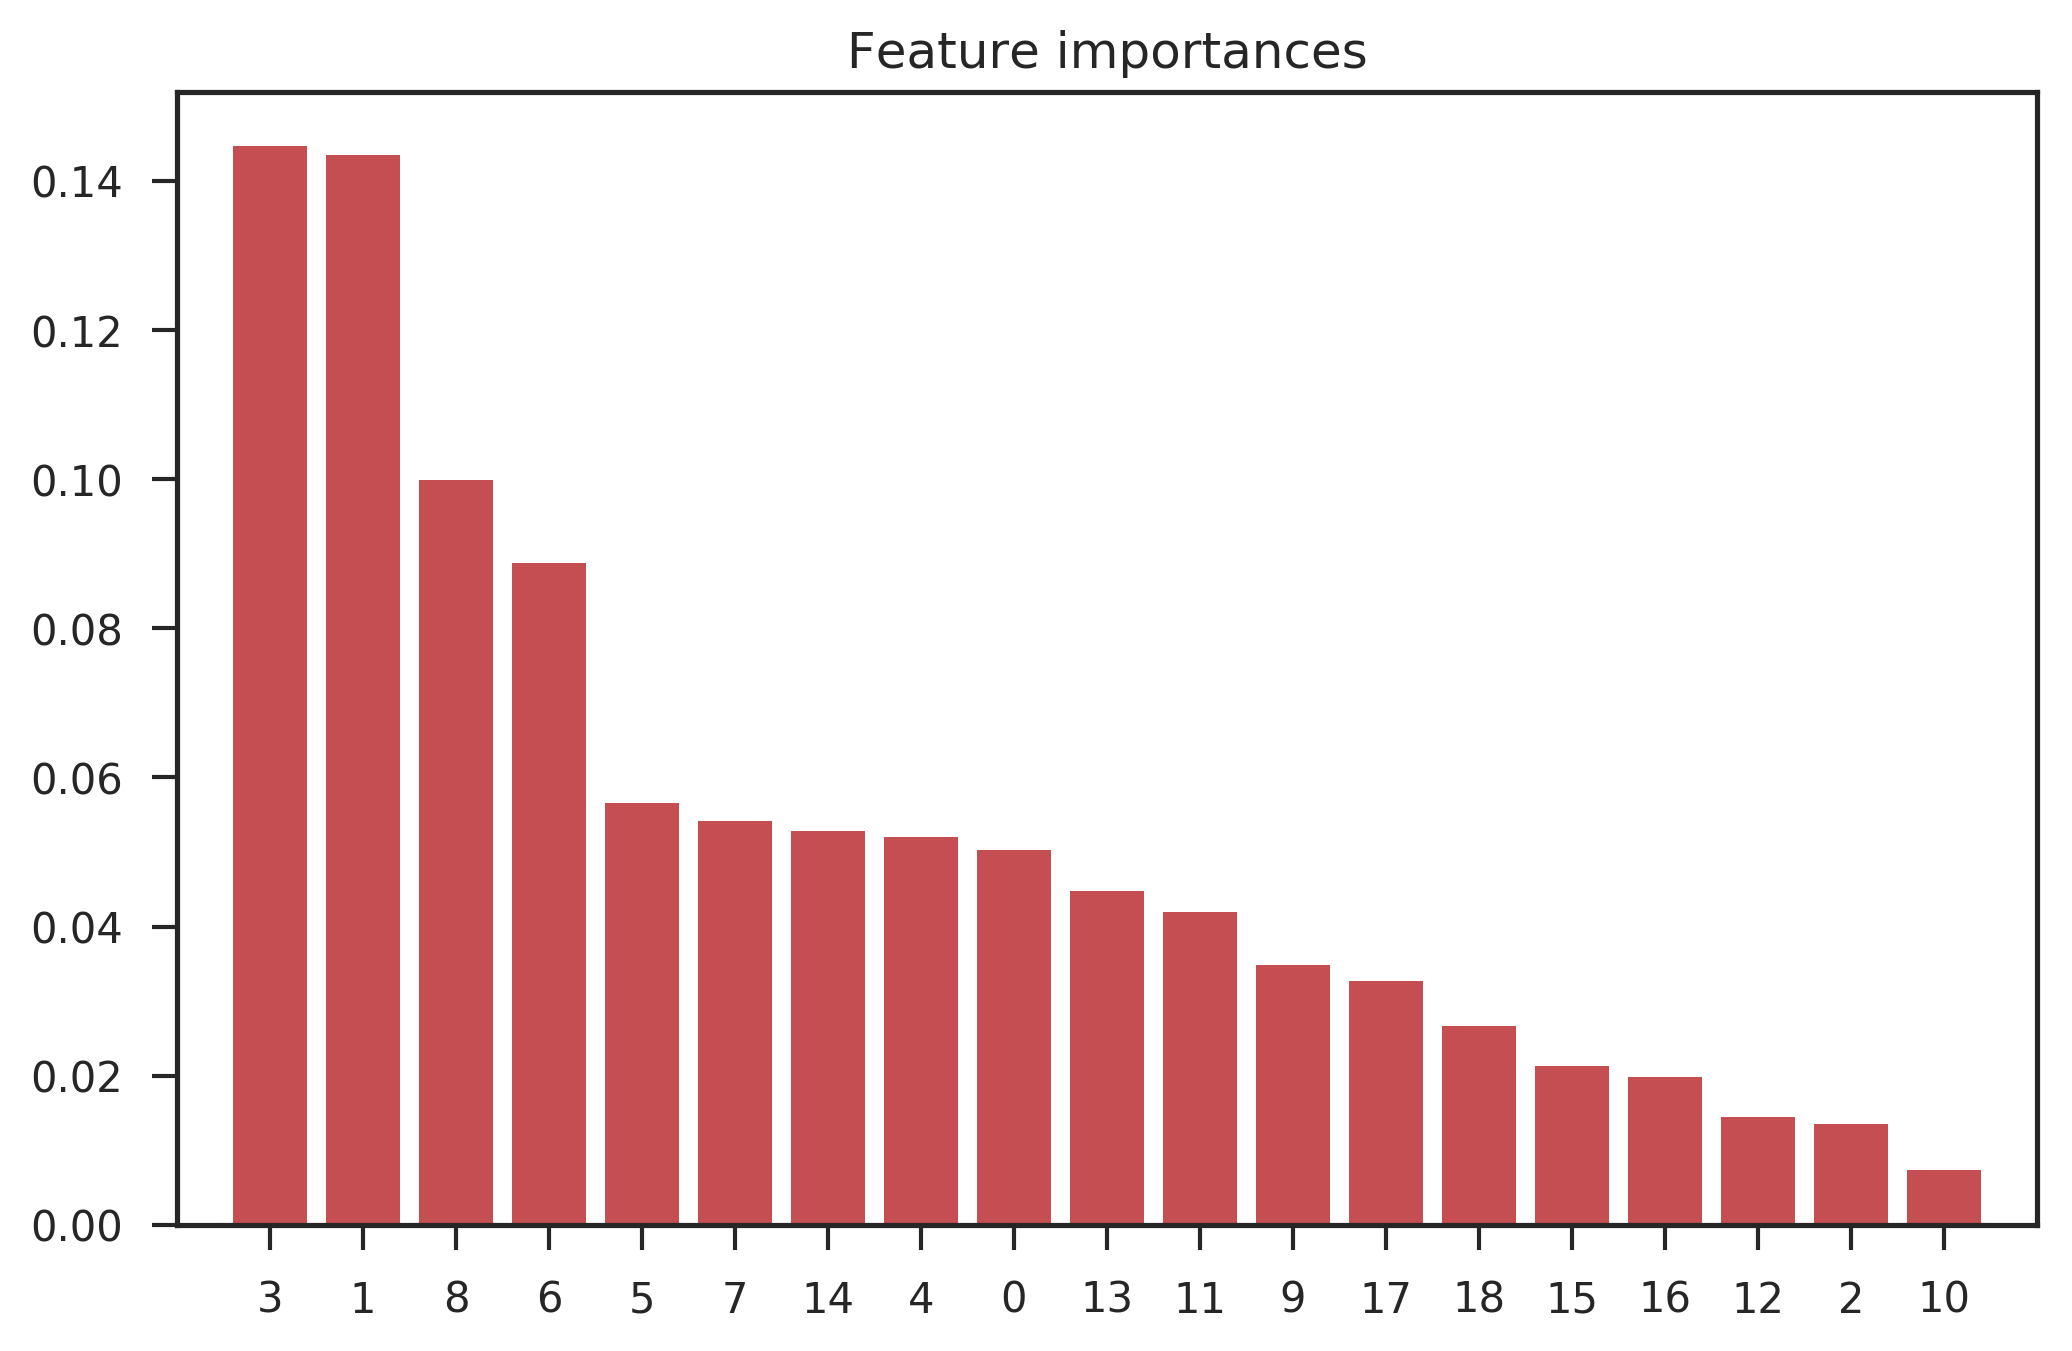

In [105]:
plt.figure()
plt.title('Feature importances')
plt.bar(range(X_train.shape[1]), importances[indices],
       color='r', yerr=std[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [106]:
X_train.iloc[2, [3,1,8,6,5,7,14,4,0,13,11,9,17,18,15,16,12,2,10]]

SexuponOutcome       1
DateTime          4185
DayuponOutcome     120
Color                5
Breed              632
Color_pre            0
YearMonth            5
AgeuponOutcome      28
Name                 1
Month                2
Breed_pre           78
AboutAge             2
Group               10
Size                 7
Season               1
Quarter              0
Year                 1
AnimalType           0
BreedMix             1
Name: 20693, dtype: int64

# ExtraTrees

In [107]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=300,random_state=0)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
print(classification_report(y_test, et.predict(X_test)))

             precision    recall  f1-score   support

          0       0.70      0.66      0.68      2159
          1       0.11      0.03      0.05        31
          2       0.38      0.13      0.19       322
          3       0.43      0.27      0.33       950
          4       0.71      0.59      0.65      1884

avg / total       0.63      0.53      0.57      5346



In [109]:
from sklearn.model_selection import cross_val_score

et_score = cross_val_score(et, X_test, y_test, scoring="accuracy", cv=5)
np.mean(et_score)

0.49719293951024196

# 전처리 전 x만 사용하면?

In [110]:
df_x1 = df_pre.iloc[:, [1,2,5,6,7,8,9]]
df_y1 = df_pre.iloc[:, [10,11,12,13,14]]

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_x1, df_y1, test_size=0.2, random_state=0)

In [111]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=8).fit(X_train1, y_train1)

In [112]:
rf = RandomForestClassifier(n_estimators=300,random_state=0)
rf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
et = ExtraTreesClassifier(n_estimators=300,random_state=0)
et.fit(X_train1, y_train1)

In [1]:
df_pre.iloc[0, [1,2,5,6,7,8,9]]

NameError: name 'df_pre' is not defined

In [ ]:
df_pre.iloc[0, [15,16,17,18,19,20,21,22,23,24,25,26]]